#1. Data Preparation

In [43]:
# Seed value
seed_value= 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [44]:
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #ploting graphs
import seaborn as sns #ploting histogram
from keras.utils import to_categorical
from sklearn import preprocessing

In [45]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [62]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/HandPoseDetection/hand-pose-data.csv")

In [63]:
df.head()

,0.0,0.0.1,90.0,0.0.2,90.0.1,90.0.2,0.0.3,90.0.3,122.989521,5.031775,...,-67.582787.1,-125.367848.1,-72.437172.1,-50.852973.1,-96.587422.1,-79.76757,-67.930081.1,-70.781021.1,-70.997175.1,-87.361629.1
0,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,135.335277,22.762292,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
1,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,141.891296,28.615349,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
2,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,141.153613,28.042486,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
3,0.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,123.134389,5.315064,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
4,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,123.769590,6.529529,...,-75.231125,-112.589115,-62.403363,-63.756582,-92.894409,-73.613791,-70.500902,-71.581979,-68.463486,-84.695577


In [64]:
data_temp = np.array(df)
labels = data_temp[:, :1]

In [65]:
data = df.reindex(columns=df.columns[1:]) 

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 2, stratify=labels)

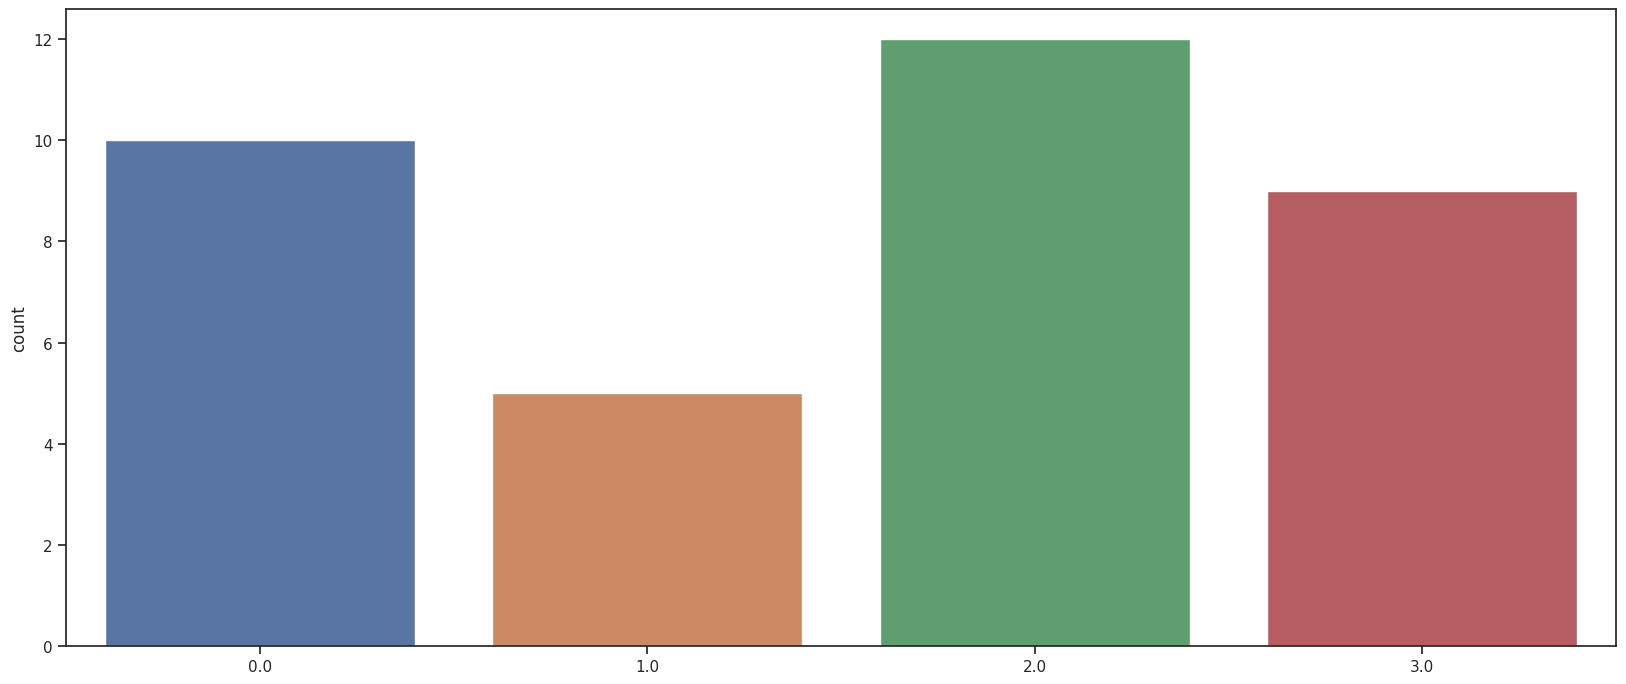

In [67]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
_ = sns.countplot(x=y_train.reshape(-1))

In [68]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (36, 73)
y_train shape: (36, 1)

X_test shape: (9, 73)
y_test shape: (9, 1)


Changing labels shape to categorical: 

In [69]:
y_train[0]

array([3.])

In [70]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [71]:
y_train[0]

array([0., 0., 0., 1.], dtype=float32)

In [72]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (36, 4)
y_test shape: (9, 4)


In [73]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [102]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [103]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (36, 73, 1)
X_test shape: (9, 73, 1)


In [74]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory']
num_classes = 4

#2. Creating and training CNN

In [80]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [100]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train_temp.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [107]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [108]:
MCP = keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/HandPoseDetection/' + 'Best_model.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [109]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 18.9005 - accuracy: 0.2188 - precision: 0.2188 - recall: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.11111, saving model to /content/gdrive/MyDrive/Colab Notebooks/HandPoseDetection/Best_model.h5
2/2 [==============================] - 1s 483ms/step - loss: 32.0113 - accuracy: 0.2500 - precision: 0.2500 - recall: 0.2500 - val_loss: 28.4314 - val_accuracy: 0.1111 - val_precision: 0.1111 - val_recall: 0.1111 - lr: 0.0100
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 27.4448 - accuracy: 0.1250 - precision: 0.1250 - recall: 0.1250
Epoch 2: val_accuracy improved from 0.11111 to 0.55556, saving model to /content/gdrive/MyDrive/Colab Notebooks/HandPoseDetection/Best_model.h5
2/2 [==============================] - 0s 61ms/step - loss: 24.9033 - accuracy: 0.1389 - precision: 0.1389 - recall: 0.1389 - val_loss: 11.2246 - val_accuracy: 0.5556 - val_precision: 0.5556 - val_recall: 0.5556 - lr: 0.0100
Ep

#3. CNN evaluation

In [115]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.2925 - accuracy: 0.8889 - precision: 0.8889 - recall: 0.8889 - 28ms/epoch - 28ms/step


[0.29252874851226807,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272]

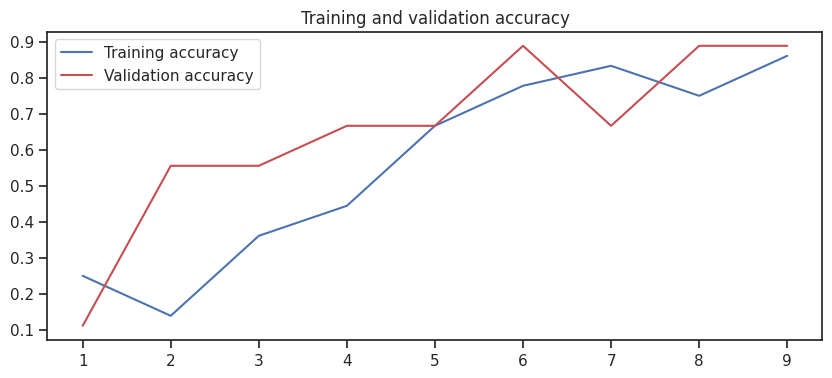

<Figure size 2000x827 with 0 Axes>

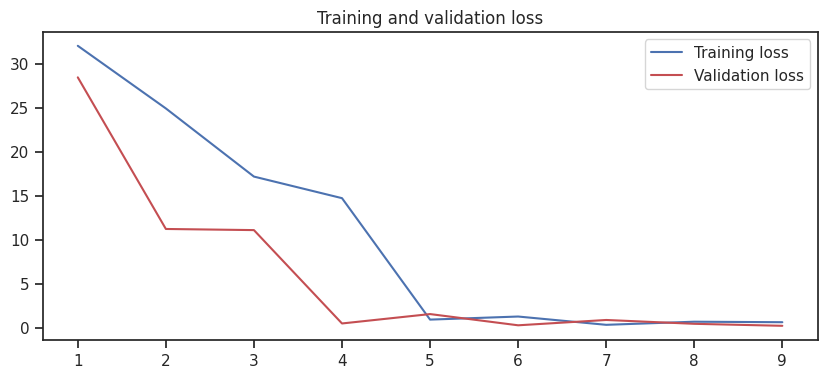

In [117]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 
plt.savefig('Training and validation accuracy.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [123]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 21ms/step


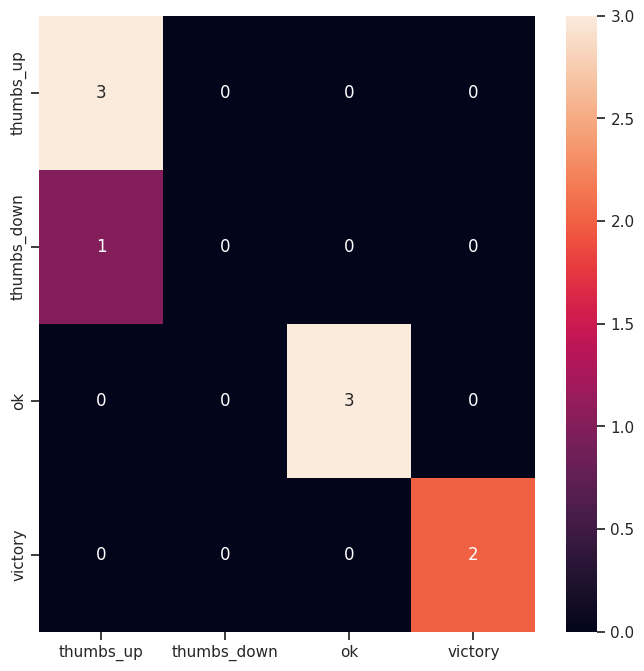

In [124]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.show()

In [125]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2

    accuracy                           0.89         9
   macro avg       0.69      0.75      0.71         9
weighted avg       0.81      0.89      0.84         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
